# Edit and Simulate SpringSaLaD Input Files

In [3]:
from SpringSaLaDpy.editor import *
from SpringSaLaDpy.Project_reader import *
from SpringSaLaDpy.executable import simulate

## Create search_directory

Create the relative path to a SIMULATIONS or FOLDER directory created by SpringSaLaD (called search_directory in this notebook). This is the location of the input file that will be edited and or simulated.

In [4]:
#search_directory = os.path.join('GUI_results', 'Nephrin-Nck-NWasp', 'Final_version_test_SIMULATIONS', 'Simulation0_SIM_SIMULATIONS')
search_directory = 'GUI_results\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER'
print(search_directory)

GUI_results\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER


## Describe Input File

Looks for a .txt file in the search_directory and displays a summary of its data. If there are multiple .txt files that match the search criteria, a warning will be displayed.

### Options:
- **search_term**: The selected file must have this string as part of its name (default '' means the last .txt file in the directory will be selected)
- **links**: Display the links between sites within each molecule (default False)
- **reactions**: Display the molecule, site, and state information for all of the reactions (default False)
- **kinetics**: Display initial molecule counts and reaction rates (default False)
- **drawings**: Display a 2D projection of each molecule onto the XY plane with proper site sizes, colors, and links (default False)

Molecules:

MOLECULE: "R" (Initial Count: 5)


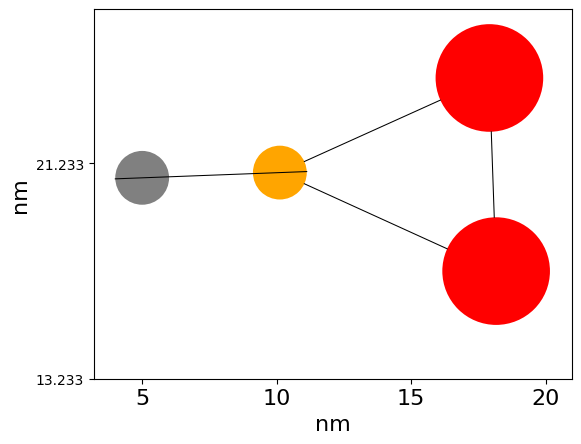

This molecule has 3 site types: R (2 possible states: State0, State1), L, Anchor

It consists of 4 connected sites:
Type R: 2 Red intracellular sites (Site 0, Site 2)
Type Anchor: 1 Gray membrane site (Site 1)
Type L: 1 Orange intracellular site (Site 3)
------------------------------------------------------------------------------------------------------------

MOLECULE: "Adapter" (Initial Count: 5)


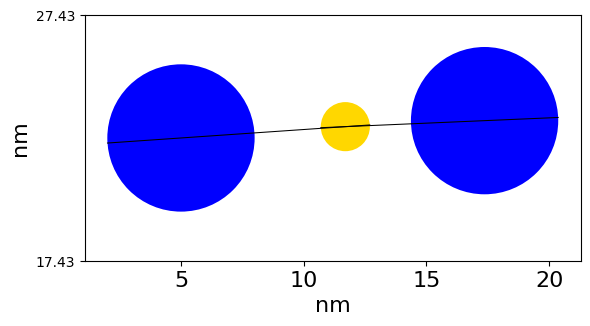

This molecule has 2 site types: A, L

It consists of 3 connected sites:
Type A: 2 Blue intracellular sites (Site 0, Site 2)
Type L: 1 Gold intracellular site (Site 1)
------------------------------------------------------------------------------------------------------------

************************************************************************************************************

Reaction Rules

State Transition Reactions: 1
A site of type R in a R molecule can change its state from State0 to State1 at a rate of 0.0 s-1 provided that it is bound to site A of a molecule Adapter

Allosteric Reactions: 1
Site 0 of molecule R can change its state from State0 to State1 at a rate of 0.0 s-1 provided that Site 2 of the same molecule is in state State0

Biomolecular Binding Reactions: 1
Site R of molecule R (in any state) can bind to site A of Adapter 
	On rate: 10.0 uM-1.s-1, off rate: 10.0 s-1


In [5]:
Describe_input_file(search_directory, search_term='', links=False, reactions=True, kinetics=True, drawings=True)

## Set Modified Input File Path

Specify the relative path to the modified input file and its name. Combine these to into a relative path to the file with os.path.join(). Of course, you can set the output_path variable manually if you know the relative path you want.

In [6]:
output_location = 'Simulate'
output_name = 'modified_input.txt'
output_path = os.path.join(output_location, output_name)
print(output_path)

Simulate\modified_input.txt


## Edit the Input File

Specify new counts and kinetic rates (on and off rate) that will be written to an input file at the location specified.

### Options:
- **output_path**: the path to the modified input file (default '' which will try to overwrite the last txt file in the search_directory)
- **counts**: the new list of molecule counts in the order they appear in the input file (default [] which leaves counts unchanged)
- **on_rate**: the new list of molecular binding reaction on rates in the order they appear in the input file (default [] which leaves on rates unchanged)
- **off_rate**: the new list of molecular binding reaction off rates in the order they appear in the input file (default [] which leaves off rates unchanged)

In [7]:
edit_input_file(search_directory, output_path=output_path, counts=[], on_rate=[], off_rate=[])

In [8]:
Describe_input_file(output_location, search_term=output_name, links=False, reactions=True, kinetics=True, drawings=False)

Molecules:

MOLECULE: "R" (Initial Count: 5)
This molecule has 3 site types: R (2 possible states: State0, State1), L, Anchor

It consists of 4 connected sites:
Type R: 2 Red intracellular sites (Site 0, Site 2)
Type Anchor: 1 Gray membrane site (Site 1)
Type L: 1 Orange intracellular site (Site 3)
------------------------------------------------------------------------------------------------------------

MOLECULE: "Adapter" (Initial Count: 5)
This molecule has 2 site types: A, L

It consists of 3 connected sites:
Type A: 2 Blue intracellular sites (Site 0, Site 2)
Type L: 1 Gold intracellular site (Site 1)
------------------------------------------------------------------------------------------------------------

************************************************************************************************************

Reaction Rules

State Transition Reactions: 1
A site of type R in a R molecule can change its state from State0 to State1 at a rate of 0.0 s-1 provided that it is b

## Run the Simulation
Send an input file to the SpringSaLaD executable.

### Options
- **runs**: The number of times the simulation should run

### Outputs
#### Structure
All simulation results will be stored in an output folder called <output_name_FOLDER> (i.e. modified_input.txt would make a folder called modified_input_FOLDER).

The output folder has the following structure:
- output_name_FOLDER
    - data
        - Run0
        - Run1
        - Run2
        - etc.
    - images
    - pyStat (isn't created until an analysis function is run)
    - videos
    - viewer_files

#### Important Subfolders
**data**: contains CSV files (grouped by run) that describe the basic non spatial properties about the simulation at every point in time like the number of clusters, the molecules in those clusters, and state of every site. 

**pyStat**: stores the data files generated when making visualizations with the analysis functions (demonstrated in analysis.ipynb). pyStat and its subfolders are automatically generated when running analysis functions.

**viewer_files**: contains txt files that describe all of the spatial simulation data. This includes the position of all the sites and the links between them at each point in time. Each txt file in this folder has the data for a single run.

In [9]:
simulate(output_path, runs=5)

Model "Simulate\modified_input.txt" is running
Simulation complete, results can be found here: c:\Users\cpero\Downloads\demo\Simulate\modified_input_FOLDER
